In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rc('legend', fontsize=26)
plt.rc('xtick', labelsize=26)
plt.rc('ytick', labelsize=26)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=18)

from tqdm import tqdm
from digitize import digitize #digitization.py module

Welcome to JupyROOT 6.22/02


In [2]:
tracks_file = 'data/to_digitize/testFile.feather'
a = digitize(tracks_file = tracks_file, gain = 1000, save = False)

100%|██████████| 20/20 [00:06<00:00,  3.26it/s]


Processing 20 of 20 events
Computing e rejection discriminants...


  0%|          | 0/20 [00:00<?, ?it/s]/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'awkward._connect._numba' failed to load due to 'AttributeError(module 'awkward' has no attribute 'nplike')'.
  entrypoints.init_all()
/home/jeff/workspace/BEAST_TPC_Fast_Digitizer/digitize.py:285: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  return data @ tuv
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/numba/core/typing/npydecl.py:933: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
100%|██████████| 20/20 [00:02<00:00,  7.34it/s]

DONE!


In [3]:
### Apply all steps of the digitization process so we can visualize everything together

tmp = a.tracks.iloc[7]
tmp2 = a.apply_diffusion(tmp)
tmp3 = a.GEM_gain_and_diffusion(tmp2)
tmp4 = a.digitize_fei4(tmp3[0],tmp3[1],tmp3[2],noise=a.base_noise)

In [4]:
###Create voxel grid to visualize digitized charge

grid = np.zeros((80,336,10))
for x,y,z,q,qt in zip(tmp4[0],tmp4[1],tmp4[2]-tmp4[2].min(),tmp4[3],tmp4[5]): #qt is truth charge
    grid[x,y,z] += q+1 #Use q+1 because the lowest nonzero charge registered as a hit is assigned a TOT code of 0

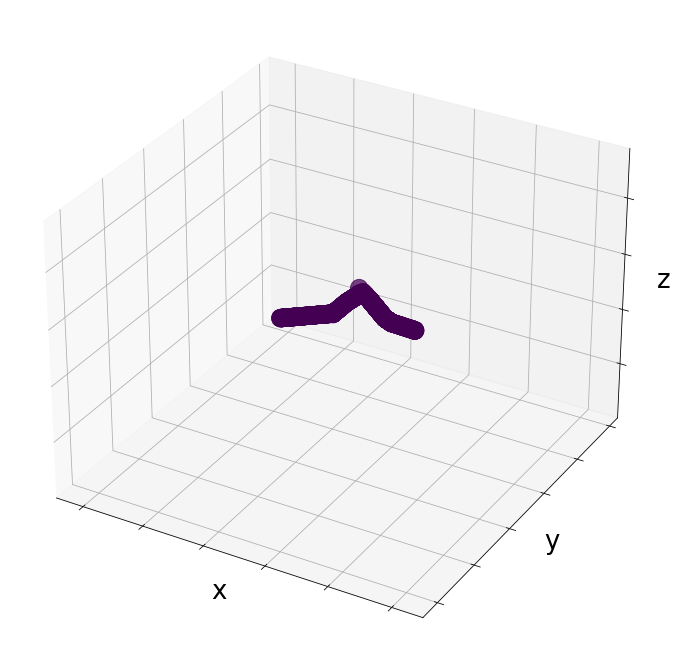

In [5]:
###Visualize just the primary track

cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=1, vmax=grid.ravel().max())
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(tmp['chipx']*10000/250,tmp['chipy']*10000/50,tmp['chipz']+12,c=tmp['NbEle'],s = 300,zorder = 1e9)
ax.set_xlabel('x')
ax.set_xticklabels([])
ax.set_ylabel('y')
ax.set_yticklabels([])
ax.set_zlabel('z')
ax.set_zticklabels([])
plt.show()

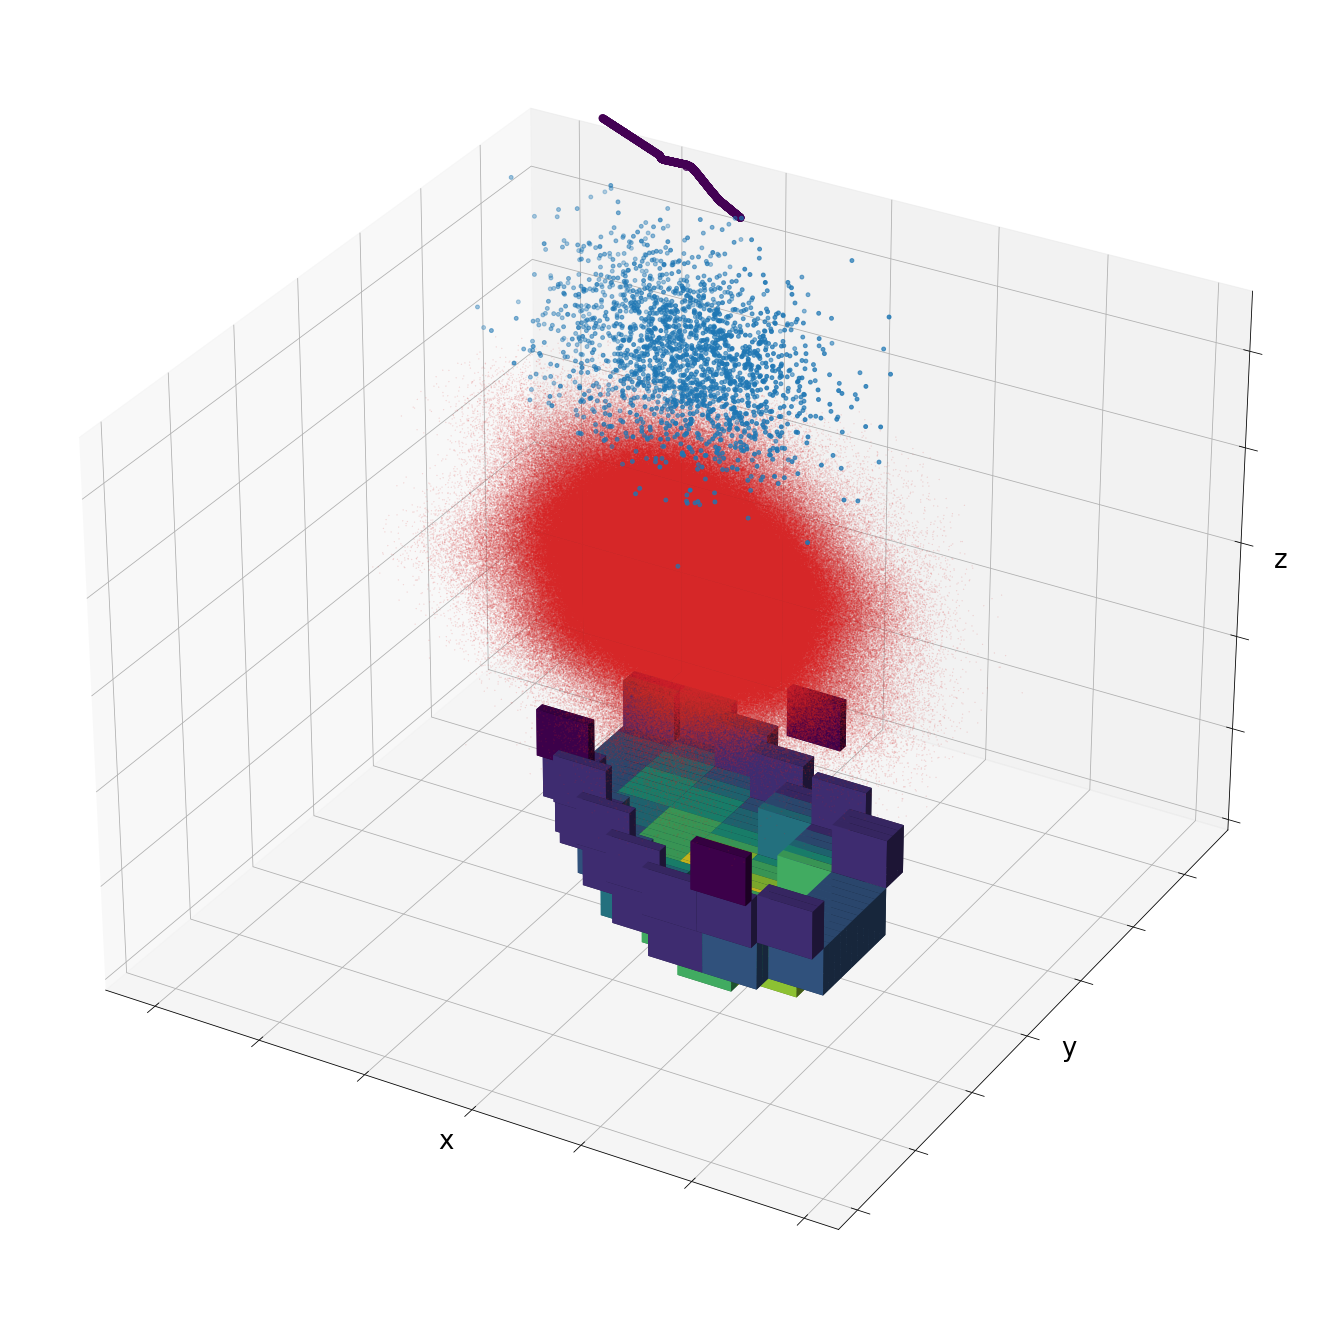

In [6]:
###Visualize all steps of digitization (will take some time to run)

fig = plt.figure(figsize = (32,24))
ax = fig.add_subplot(projection='3d')
mapp = ax.scatter(tmp['chipx']*10000/250+tmp4[0].mean(),tmp['chipy']*10000/50+tmp4[1].mean(),(tmp['chipz']-tmp['chipz'].min())*10000/250+14,c=tmp['NbEle'],s = 50, zorder = 1e9)
ax.scatter(tmp2['x']*10000/250+tmp4[0].mean(),tmp2['y']*10000/50+tmp4[1].mean(),(tmp2['z']-tmp2['z'].min())*10000/250+8.5,s=15,zorder=1e8)
ax.scatter(tmp3[0]*10000/250+tmp4[0].mean(),tmp3[1]*10000/50+tmp4[1].mean(),(tmp3[2]-tmp3[2].min())*10000/250+2.5,s=0.05, c='tab:red',alpha = 0.3)
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=1, vmax=grid.ravel().max())
ax.voxels(grid,facecolors = cmap(norm(grid)))
ax.set_zlim(0,11)
ax.set_xlim((tmp3[0]*10000/250).min()+tmp4[0].mean(),(tmp3[0]*10000/250).max()+tmp4[0].mean())
ax.set_ylim((tmp3[1]*10000/50).min()+tmp4[1].mean(),(tmp3[1]*10000/50).max()+tmp4[1].mean())
ax.set_xlabel('x')
ax.set_xticklabels([])
ax.set_ylabel('y')
ax.set_yticklabels([])
ax.set_zlabel('z')
ax.set_zticklabels([])

plt.show()